In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from scipy.io import loadmat
mat=loadmat("/content/ex7data2.mat")
X=mat["X"]

In [ ]:
#initialize centroids
import random
init_centroids=random.sample(range(0,len(X)),3)

In [ ]:
init_centroids

[251, 207, 268]

In [ ]:
centroids=[]
for i in init_centroids:
  centroids.append(X[i])
centroids

[array([6.69451358, 2.89056083]),
 array([5.58162906, 3.33510375]),
 array([5.37052667, 2.44954813])]

In [ ]:
def calc_dist(x1,x2):
  return (sum((x1-x2)**2))**0.5

In [ ]:
def findclosestcentroid(centroid,x):
  assigned_centroid=[]
  for i in x:
    distance=[]
    for j in centroid:
      distance.append(calc_dist(i,j))
    assigned_centroid.append(np.argmin(distance))
  return assigned_centroid

In [ ]:
findclosestcentroid(centroids,X)

[np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.in

In [ ]:
#mean of the observation falling in each cluster category
def new_centroid(centroid,x):
  new_centroids=[]
  new_df=pd.concat([pd.DataFrame(x),pd.DataFrame(centroid,columns=['centroids'])],axis=1)
  for c in set(new_df['centroids']):
    current_cluster=new_df[new_df['centroids']==c][new_df.columns[:-1]]
    new_mean=current_cluster.mean(axis=0)
    new_centroids.append(new_mean)
  return new_centroids

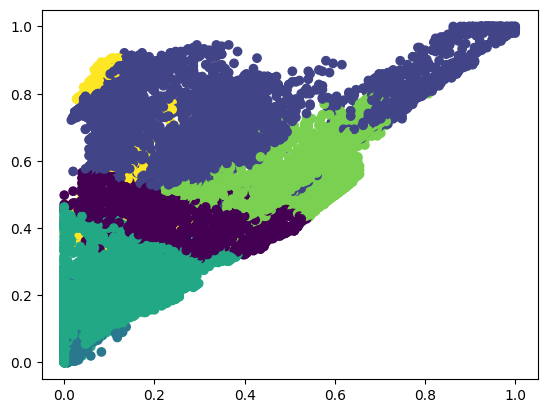

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

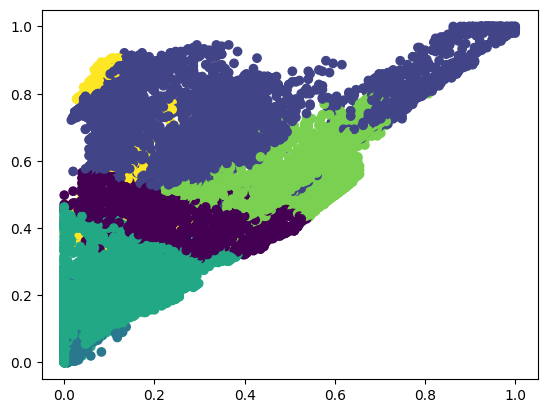

In [ ]:
for i in range(10):
  obs_cen=findclosestcentroid(centroids,X)
  centroids=new_centroid(obs_cen,X)
  plt.figure()
  plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color='black')
  plt.scatter(X[:,0],X[:,1],c=obs_cen)
  plt.show(X[:,0],X[:,1])

In [ ]:
centroids

[array([6.69451358, 2.89056083]),
 array([5.58162906, 3.33510375]),
 array([5.37052667, 2.44954813])]

In [ ]:
#image compression
import cv2
img=cv2.imread("/content/cat.jpg")
img.shape

(200, 200, 3)

In [ ]:
im=(img/255).reshape(200*200,3)

In [ ]:
import random
init_centroids=random.sample(range(0,len(im)),6)

In [ ]:
centroids=[]
for i in init_centroids:
  centroids.append(im[i])
centroids

[array([0.33333333, 0.36470588, 0.43137255]),
 array([0.33333333, 0.66666667, 0.75294118]),
 array([0.01176471, 0.03921569, 0.95686275]),
 array([0.25490196, 0.26666667, 0.3254902 ]),
 array([0.45882353, 0.52156863, 0.56862745]),
 array([0.09803922, 0.59607843, 0.98039216])]

In [ ]:
X=np.array(im)
for i in range(10):
  obs_cen=findclosestcentroid(centroids,X)
  centroids=new_centroid(obs_cen,X)

In [ ]:
# reconstruct the image using the new centroids
compressed_image = np.zeros(im.shape)
for i in range(len(im)):
    compressed_image[i] = centroids[obs_cen[i]]

compressed_image = compressed_image.reshape(img.shape)
plt.imshow(compressed_image)
plt.title("Compressed Image")
plt.axis('off')
plt.show()